<a href="https://colab.research.google.com/github/wilbertcaine/MATH4432/blob/main/Assignment%204/Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problems from the text book

## Q3

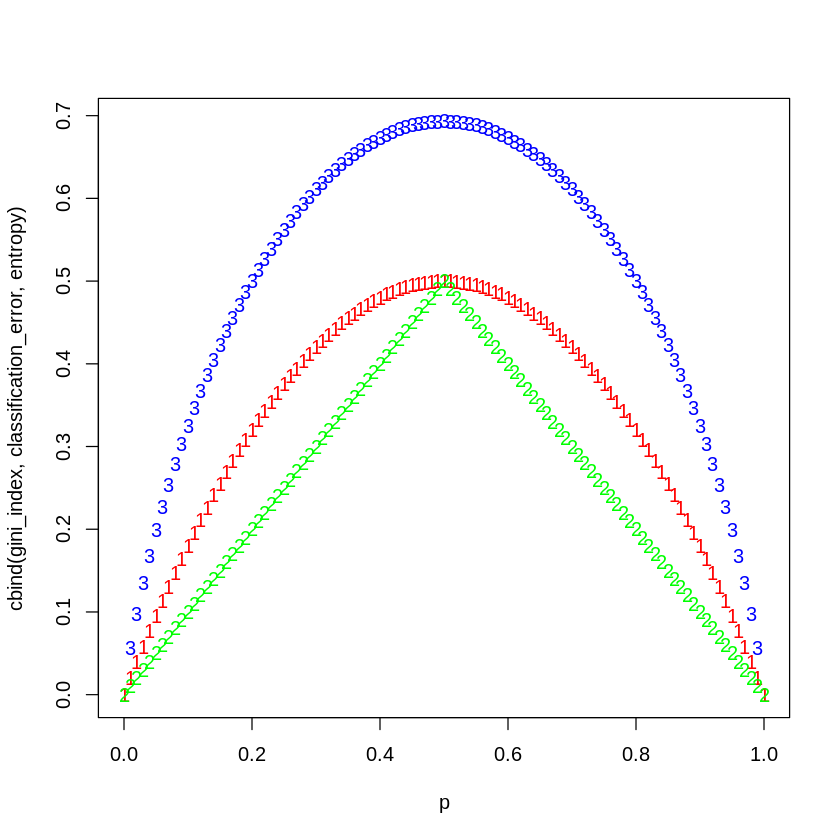

In [71]:
p = seq(0, 1, 0.01)
gini_index = p * (1-p) * 2
classification_error = 1 - pmax(p,1-p)
entropy = - (p*log(p) + (1-p)*log(1-p))
matplot(p, cbind(gini_index, classification_error, entropy), col = c("red", "green", "blue"))

# Coding problem

In [1]:
install.packages("gbm")
library(gbm)
# source("/import/home/mcaiad/Documents/courses/hw4/adaboost.R")  # implement your own adaboost here
niter <- 1000 # number of trees to grow in adaboost

# read training data
# data_train <- read.table("/import/home/mcaiad/Documents/courses/hw4/data_train.txt",header = T)
# https://drive.google.com/file/d/1nJ-XCEB6ums9Rew1GBvhnVM3aU7GJNAu/view?usp=sharing
system("gdown --id 1nJ-XCEB6ums9Rew1GBvhnVM3aU7GJNAu")
data_train <- read.table("data_train.txt",header = T)
y <- data_train$y
x <- data.matrix(data_train[,-1])

# read testing data
# data_test <- read.table("/import/home/mcaiad/Documents/courses/hw4/data_test.txt",header = T)
# https://drive.google.com/file/d/122ZTJSrQGRvZctLji-EdzQWSxI7Pis-m/view?usp=sharing
system("gdown --id 122ZTJSrQGRvZctLji-EdzQWSxI7Pis-m")
data_test <- read.table("data_test.txt",header = T)
hold.out.y <- data_test$y
hold.out.x <- data.matrix(data_test[,-1])

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loaded gbm 2.1.8



In [4]:
library(rpart)
library(repr)

set.seed(1)

adaboost <- function(x,y,x2,m = 1000,treedepth = 1,minsplit = 1,minbucket = 1){

  n <- length(y)
  rpart_crtl <- rpart.control(minsplit = minsplit,minbucket = minbucket,maxdepth = treedepth)
  
  M = m
  w <- matrix(0,n,M+1)
  p <- matrix(0,n,M)
  e <- matrix(0,M)
  a <- matrix(0,M)
  trees <- list()
  w[,1] = 1/n
  for(m in 1:M){
    # a
    dat <- data.frame(x=x,y=y)
    fit_tree <- rpart(y~.,dat,weights=w[,m],method = "class",control = rpart_crtl)
    pred <- predict(fit_tree,type="class")
    p[,m] <- pred==y
    # b
    e[m] <- sum(w[,m] * (pred != y)) / sum(w[,m])
    a[m] <- log((1 - e[m]) / e[m])
    # c
    w[,m+1] <- w[,m] * exp(a[m] * (pred != y))
    trees[[m]] <- fit_tree
  }
  ret <- list(M=M,w=w,p=p,e=e,a=a,trees=trees)
  class(ret) <- "adaboost"
  return(ret)
}

predict.adaboost <- function(object,x){
  n = nrow(x)
  f <- matrix(0,n,object$M)
  prediction <- matrix(0,n,object$M)
  m = 1
  f[,m] = object$a[m] * as.integer(predict(object$trees[[m]],newdata=data.frame(x=x),type="class"))
  prediction[,m] = sign(f[,m])
  for(m in 2:object$M){
    f[,m] = f[,m-1] + object$a[m] * as.integer(predict(object$trees[[m]],newdata=data.frame(x=x),type="class"))
    prediction[,m] = sign(f[,m])
  }
  ret <- list(f = f,prediction = prediction)
  class(ret) <- "yh_adaboost"
  return(ret)
}

[1] 0.53

[1] 0.53

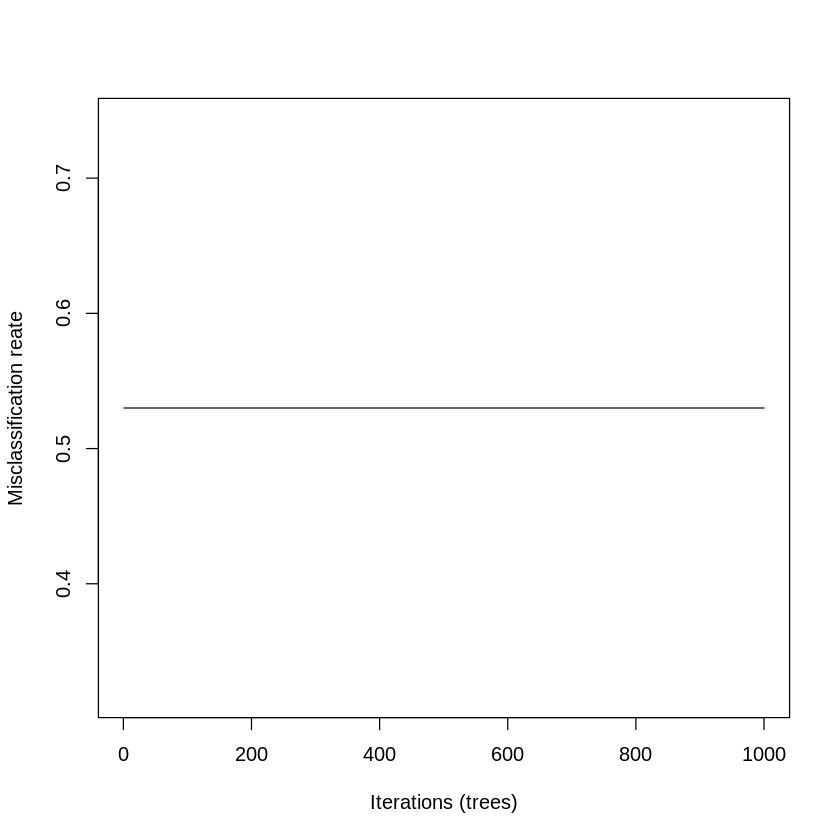

In [5]:
fit_adaboost <- adaboost(x,y,x,m = niter,treedepth = 1)
yh_adaboost <- predict(fit_adaboost,x)
plot(colMeans(yh_adaboost$prediction!=y),type="l",xlab = "Iterations (trees)",ylab="Misclassification reate")
# misclassification rate of the final model
mean(yh_adaboost$prediction[,niter]!=y)
# misclassification rate of the best model
min(colMeans(yh_adaboost$prediction!=y))

[1] 0.5

[1] 0.5

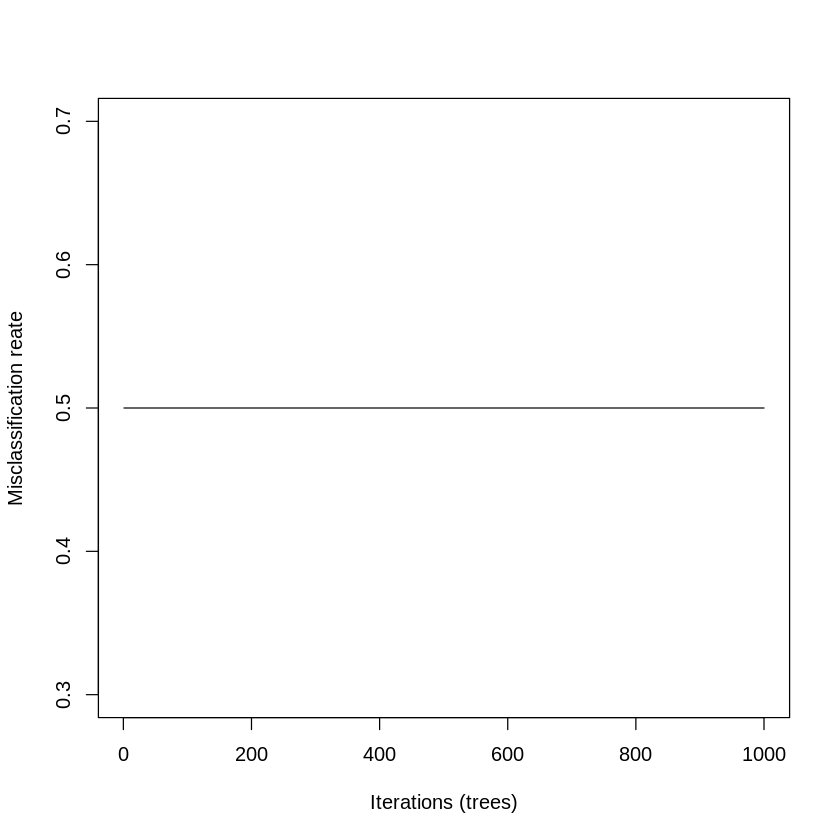

In [55]:
fit_adaboost <- adaboost(x,y,hold.out.x,m = niter,treedepth = 1)
yh_adaboost <- predict(fit_adaboost,hold.out.x)
plot(colMeans(yh_adaboost$prediction!=hold.out.y),type="l",xlab = "Iterations (trees)",ylab="Misclassification reate")
# misclassification rate of the final model
mean(yh_adaboost$prediction[,niter]!=hold.out.y)
# misclassification rate of the best model
min(colMeans(yh_adaboost$prediction!=hold.out.y))

[1] 0.282

[1] 0.282

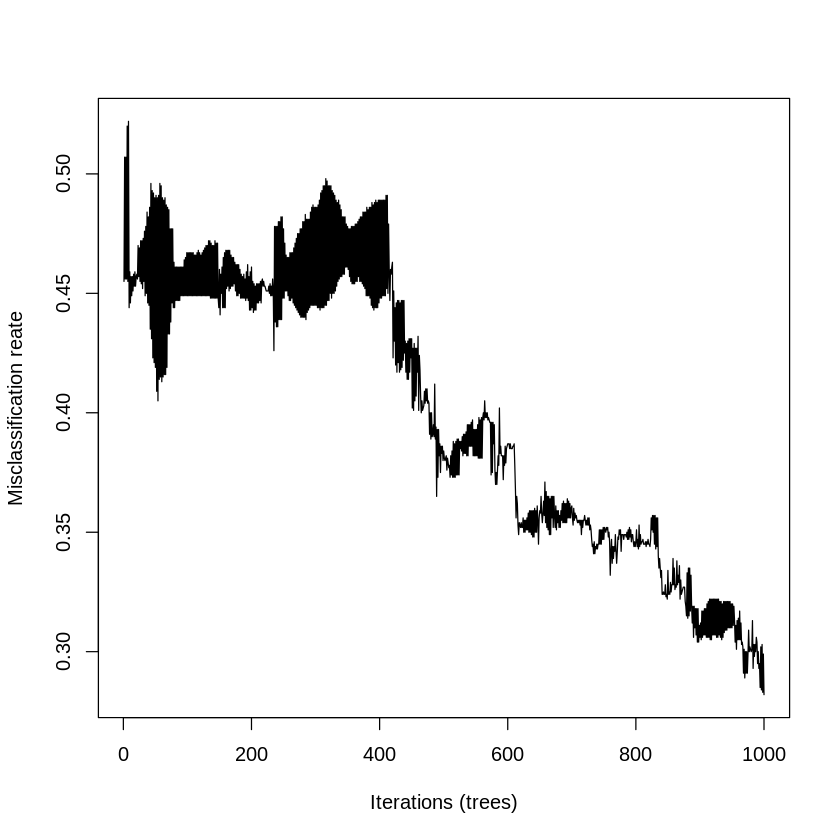

In [50]:
library(rpart)
library(repr)

set.seed(1)

adaboost <- function(x,y,x2,m = 1000,treedepth = 2,minsplit = 10,minbucket = 10){

  n <- length(y)
  rpart_crtl <- rpart.control(minsplit = minsplit,minbucket = minbucket,maxdepth = treedepth)
  
  M = m
  w <- matrix(0,n,M+1)
  p <- matrix(0,n,M)
  e <- matrix(0,M)
  a <- matrix(0,M)
  trees <- list()
  w[,1] = 1/n
  for(m in 1:M){
    # a
    dat <- data.frame(x=x,y=y)
    # print(w[,m])
    fit_tree <- rpart(y~.,dat,weights=w[,m],method = "class",control = rpart_crtl)
    pred <- predict(fit_tree,type="class")
    p[,m] <- pred==y
    # print(sum(as.integer(pred))/length(y))
    # print(as.integer(as.character(pred)))
    # b
    e[m] <- sum(w[,m] * (pred != y))/n
    a[m] <- 0.5*log((1 - e[m]) / e[m])
    # c
    w[,m+1] <- w[,m] * exp(a[m] * (2*(pred != y)-1))
    w[,m+1] = w[,m+1] / sum(w[,m+1])
    trees[[m]] <- fit_tree
  }
  ret <- list(M=M,w=w,p=p,e=e,a=a,trees=trees)
  class(ret) <- "adaboost"
  return(ret)
}

predict.adaboost <- function(object,x){
  n = nrow(x)
  f <- matrix(0,n,object$M)
  prediction <- matrix(0,n,object$M)
  m = 1
  f[,m] = object$a[m] * as.integer(as.character(predict(object$trees[[m]],newdata=data.frame(x=x),type="class")))
  prediction[,m] = sign(f[,m])
  for(m in 2:object$M){
    f[,m] = f[,m-1] + object$a[m] * as.integer(as.character(predict(object$trees[[m]],newdata=data.frame(x=x),type="class")))
    prediction[,m] = sign(f[,m])
  }
  ret <- list(f = f,prediction = prediction)
  class(ret) <- "yh_adaboost"
  return(ret)
}

fit_adaboost <- adaboost(x,y,hold.out.x,m = 1000,treedepth = 1)
yh_adaboost <- predict(fit_adaboost,hold.out.x)
plot(colMeans(yh_adaboost$prediction!=hold.out.y),type="l",xlab = "Iterations (trees)",ylab="Misclassification reate")
# misclassification rate of the final model
mean(yh_adaboost$prediction[,1000]!=hold.out.y)
# misclassification rate of the best model
min(colMeans(yh_adaboost$prediction!=hold.out.y))

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[1] 0.53

[1] 0.53

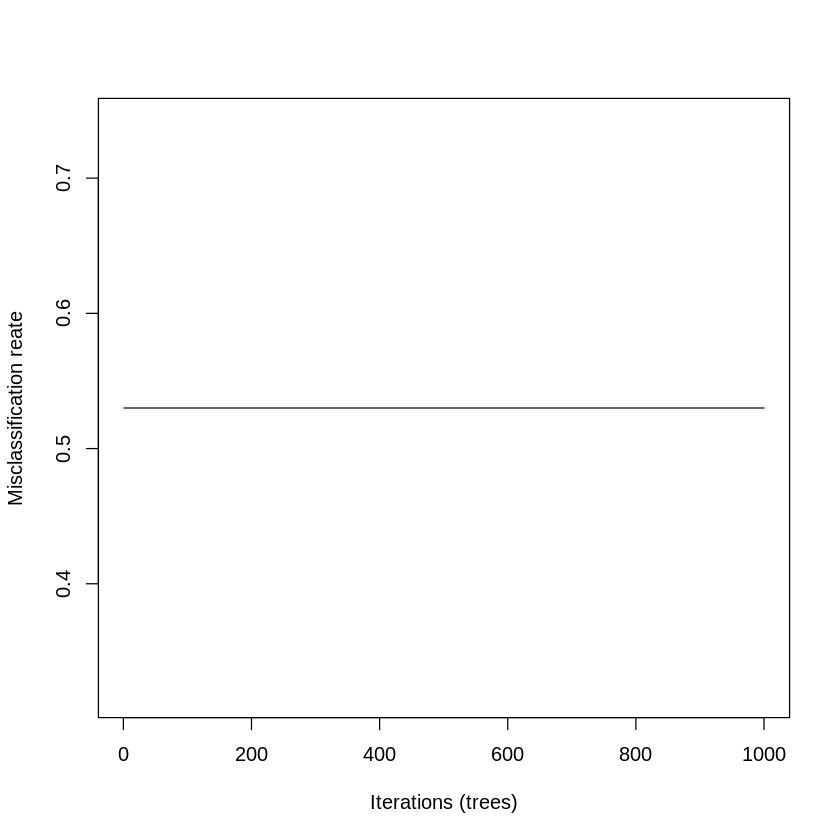

In [30]:
fit_adaboost <- adaboost(x,y,x,m = niter,treedepth = 1)
yh_adaboost <- predict(fit_adaboost,x)
plot(colMeans(yh_adaboost$prediction!=y),type="l",xlab = "Iterations (trees)",ylab="Misclassification reate")
# misclassification rate of the final model
mean(yh_adaboost$prediction[,niter]!=y)
# misclassification rate of the best model
min(colMeans(yh_adaboost$prediction!=y))